# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Paso 1: Descripción de los Datos
Plan de Solución:
Lectura de Archivos:

Utilizar pd.read_csv() para leer cada archivo de datos (instacart_orders.csv, products.csv, aisles.csv, departments.csv, order_products.csv) con los parámetros adecuados para garantizar una lectura correcta de los datos.
Verificación de la Información:

Para cada DataFrame creado, verificar la información básica utilizando métodos como head(), info(), y describe() para comprender la estructura y los tipos de datos presentes.
Asegurarse de que las columnas de identificación (ID) sean de tipo numérico y que los datos estén correctamente formateados.
Identificación de Posibles Problemas:

Buscar valores nulos, duplicados o inconsistencias en los datos.
Tratar los problemas identificados según sea necesario, como completar los valores faltantes o eliminar los duplicados.
Resumen de los Datos:

Realizar un resumen breve de cada DataFrame, destacando la información clave y cualquier problema encontrado durante la exploración inicial de los datos.





In [28]:
# importar librerías
import pandas as pd

In [29]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv')
df_products = pd.read_csv('/datasets/products.csv')
df_order_products = pd.read_csv('/datasets/order_products.csv')
df_aisles = pd.read_csv('/datasets/aisles.csv')
df_departments = pd.read_csv('/datasets/departments.csv')

In [30]:
# mostrar información del DataFrame
print(df_orders.head())
df_orders.info()

  order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
0                        1515936;183418;11;6;13;30.0                              
1                          1690866;163593;5;5;12;9.0                              
2                           1454967;39980;4;5;19;2.0                              
3                         1768857;82516;56;0;20;10.0                              
4                         3007858;196724;2;4;12;17.0                              
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count   Dtype 
---  ------                                                                            --------------   ----- 
 0   order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order  478967 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [31]:
# mostrar información del DataFrame
print(df_products)
df_products.info()

          product_id;product_name;aisle_id;department_id
0                     1;Chocolate Sandwich Cookies;61;19
1                              2;All-Seasons Salt;104;13
2            3;Robust Golden Unsweetened Oolong Tea;94;7
3      4;Smart Ones Classic Favorites Mini Rigatoni W...
4                       5;Green Chile Anytime Sauce;5;13
...                                                  ...
49689           49690;HIGH PERFORMANCE ENERGY DRINK;64;7
49690         49691;ORIGINAL PANCAKE & WAFFLE MIX;130;14
49691  49692;ORGANIC INSTANT OATMEAL LIGHT MAPLE BROW...
49692                49693;SPRING WATER BODY WASH;127;11
49693                 49694;BURRITO- STEAK & CHEESE;38;1

[49694 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   product_id;product_name;a

In [32]:
# mostrar información del DataFrame
print(df_order_products)
df_order_products.info()

        order_id;product_id;add_to_cart_order;reordered
0                                  2141543;11440;17.0;0
1                                     567889;1560;1.0;1
2                                   2261212;26683;1.0;1
3                                    491251;8670;35.0;1
4                                    2571142;1940;5.0;1
...                                                 ...
4545002                             577211;15290;12.0;1
4545003                             1219554;21914;9.0;0
4545004                              692640;47766;4.0;1
4545005                                319435;691;8.0;1
4545006                             1398151;28733;9.0;0

[4545007 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 1 columns):
 #   Column                                           Dtype 
---  ------                                           ----- 
 0   order_id;product_id;add_to_cart_order;reordered  object
dtype

In [33]:
# mostrar información del DataFrame
print(df_aisles)
df_aisles.info()

                     aisle_id;aisle
0           1;prepared soups salads
1               2;specialty cheeses
2             3;energy granola bars
3                   4;instant foods
4      5;marinades meat preparation
..                              ...
129    130;hot cereal pancake mixes
130                   131;dry pasta
131                      132;beauty
132  133;muscles joints pain relief
133  134;specialty wines champagnes

[134 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   aisle_id;aisle  134 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


In [34]:
# mostrar información del DataFrame
print(df_departments)
df_departments.info()

   department_id;department
0                  1;frozen
1                   2;other
2                  3;bakery
3                 4;produce
4                 5;alcohol
5           6;international
6               7;beverages
7                    8;pets
8         9;dry goods pasta
9                   10;bulk
10         11;personal care
11          12;meat seafood
12                13;pantry
13             14;breakfast
14          15;canned goods
15            16;dairy eggs
16             17;household
17                18;babies
18                19;snacks
19                  20;deli
20               21;missing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   department_id;department  21 non-null     object
dtypes: object(1)
memory usage: 296.0+ bytes


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
El paso 1 proporciona una visión general de los datos y ayuda a entender la estructura y la calidad de los datos antes de comenzar con el análisis exploratorio de datos y el preprocesamiento.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
Verificar y corregir los tipos de datos para asegurarnos de que las columnas de ID sean números enteros si es necesario.
Identificar y completar los valores ausentes utilizando métodos como la imputación o la eliminación, según corresponda.
Identificar y eliminar los valores duplicados para garantizar la integridad de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [35]:
# Revisa si hay pedidos duplicados
duplicates = df_orders.duplicated()
print(duplicates.any())
for column in df_orders.columns:
    unique_values = df_orders[column].nunique()
    print(f"Valores únicos en la columna '{column}': {unique_values}")


True
Valores únicos en la columna 'order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order': 478952


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Sí, parece que hay líneas duplicadas en el DataFrame de pedidos (df_orders). Las líneas duplicadas tienen en común los mismos valores en todas las columnas del DataFrame.

In [36]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
wednesday_2am_orders = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
print(wednesday_2am_orders)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
Este resultado sugiere que hay un total de 121 pedidos que se realizaron específicamente los miércoles a las 2:00 a.m. en el conjunto de datos. Esto podría ser interesante para analizar los hábitos de compra de los usuarios en ese momento específico del día. 

In [37]:
# Elimina los pedidos duplicados
df_orders.drop_duplicates(inplace=True)

In [38]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().any())

False


In [39]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_orders['order_id'].duplicated().any())

False


Describe brevemente tus hallazgos y lo que hiciste con ellos
Después de revisar los datos, encontramos duplicaciones en los pedidos. Eliminamos estas duplicaciones utilizando el método drop_duplicates() en el DataFrame df_orders. Verificamos que no hubiera más filas duplicadas ni IDs de pedidos duplicados, asegurando así la integridad de los datos.

### `products` data frame

In [40]:
# Verifica si hay filas totalmente duplicadas
df_products = pd.read_csv('/datasets/products.csv',sep=';')
print(df_products.duplicated().any())

False


In [41]:
# Revisa únicamente si hay ID de departamentos duplicados
print(df_products['department_id'].duplicated().any())

True


In [42]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name_upper'] = df_products['product_name'].str.upper()

In [43]:
# Revisa si hay nombres duplicados de productos no faltantes
print(df_products[df_products['product_name'].notnull()]['product_name_upper'].duplicated().any())

True


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los hallazgos indican lo siguiente:

No hay filas totalmente duplicadas en el DataFrame de productos.
Hay IDs de departamentos duplicados en el DataFrame de productos.
Hay nombres de productos duplicados cuando se convierten a letras mayúsculas para una mejor comparación.
También hay nombres de productos duplicados entre los productos no faltantes.
Para abordar estos hallazgos, se tomaron las siguientes acciones:

Se verificó la presencia de filas totalmente duplicadas en el DataFrame de productos.
Se verificó la presencia de IDs de departamentos duplicados en el DataFrame de productos.
Se creó una nueva columna en el DataFrame de productos que contiene los nombres de productos convertidos a letras mayúsculas para una comparación más efectiva.
Se verificó la presencia de nombres de productos duplicados entre los productos no faltantes en el DataFrame.

### `departments` data frame

In [44]:
# Revisa si hay filas totalmente duplicadas
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
print(df_departments.duplicated().any())

False


In [45]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_departments['department_id'].duplicated().any())

False


In [46]:
print(df_departments['department_id'].duplicated().any())

False


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `aisles` data frame

In [47]:
# Revisa si hay filas totalmente duplicadas
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
print(df_aisles.duplicated().any())


False


In [48]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_aisles['aisle_id'].duplicated().any())

False


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Los hallazgos son los siguientes:

No hay filas totalmente duplicadas en el DataFrame de departamentos.
No hay IDs duplicadas de departamentos en el DataFrame de departamentos.
Esto sugiere que los datos en el DataFrame de departamentos son únicos y no hay problemas de duplicación que requieran intervención. Por lo tanto, no se tomaron medidas adicionales ya que los datos parecen estar limpios y listos para su uso en análisis posteriores.

### `order_products` data frame

In [49]:
# Revisa si hay filas totalmente duplicadas
df_order_products = pd.read_csv('/datasets/order_products.csv',sep=';')
print(df_order_products.duplicated().any())


False


In [50]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_order_products[df_order_products.duplicated(keep=False)])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
El código proporcionado verifica si hay filas totalmente duplicadas en el DataFrame de productos del pedido y luego vuelve a verificar si hay cualquier otro duplicado engañoso. Los resultados muestran que no hay filas totalmente duplicadas y que no hay duplicados engañosos en el DataFrame.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [51]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_product_names = df_products[df_products['product_name'].isnull()]
print(missing_product_names)

       product_id product_name  aisle_id  department_id product_name_upper
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


Describe brevemente cuáles son tus hallazgos.

Los hallazgos son los siguientes:

Hay 1258 valores ausentes en la columna 'product_name' del DataFrame de productos.
Estos valores ausentes están asociados con productos que no tienen nombre especificado en el conjunto de datos.
Todos los productos con nombres ausentes parecen estar relacionados con el pasillo con ID 100 y el departamento con ID 21.

In [52]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
all_missing_in_aisle_100 = missing_product_names['aisle_id'].eq(100).all()
print(all_missing_in_aisle_100)

True


Describe brevemente cuáles son tus hallazgos.
Los hallazgos son los siguientes:

Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100.
No hay productos con nombres ausentes que estén asociados con otros pasillos en el conjunto de datos.

In [53]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
all_missing_in_department_21 = missing_product_names['department_id'].eq(21).all()
print(all_missing_in_department_21)

True


Describe brevemente cuáles son tus hallazgos.

In [59]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
merged_data = missing_product_names.merge(df_aisles, left_on='aisle_id', right_on='aisle_id', how='left').merge(df_departments, left_on='department_id', right_on='department_id', how='left')
all_missing_in_department_21 = (merged_data['department_id'] == 21).all()
print(all_missing_in_department_21)

True


Describe brevemente cuáles son tus hallazgos.

Los hallazgos indican que todos los productos faltantes están efectivamente relacionados con el departamento con ID 21. Esto sugiere que los productos que no tienen nombre especificado en el conjunto de datos pertenecen exclusivamente al departamento con ID 21.

In [55]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)
print(df_products[df_products['product_name'].isnull()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id, product_name_upper]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Después de completar los nombres de los productos ausentes con 'Unknown', se verificó nuevamente si había valores nulos en la columna 'product_name'. Los hallazgos indican que no hay productos con nombres faltantes en el DataFrame de productos. 

### `orders` data frame

In [56]:
# Encuentra los valores ausentes
missing_values = df_orders.isnull().sum()
print(missing_values)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [57]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
missing_values_not_first_order = df_orders[(df_orders['order_number'] != 1) & df_orders.isnull().any(axis=1)]
print(missing_values_not_first_order)


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Los hallazgos indican que hay valores ausentes en la columna 'days_since_prior_order', con un total de 28,817 valores faltantes en esa columna. 

### `order_products` data frame

In [58]:
# Encuentra los valores ausentes
missing_values = df_order_products.isnull().sum()
print(missing_values)


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_value = df_order_products['order_id'].min()
max_value = df_order_products['order_id'].max()
print(min_value)
print(max_value)

4
3421079


Describe brevemente cuáles son tus hallazgos.
Los hallazgos muestran que hay valores faltantes en la columna 'add_to_cart_order', con un total de 836 valores ausentes en esa columna. Además, se ha encontrado que el valor mínimo en la columna 'order_id' es 4, mientras que el valor máximo es 3421079. 

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id'].unique()
print(missing_add_to_cart_order)


[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
missing_orders = df_order_products[df_order_products['order_id'].isin(missing_add_to_cart_order)]
all_missing_orders_have_more_than_64_products = (missing_orders.groupby('order_id').size() > 64).all()

print(all_missing_orders_have_more_than_64_products)

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
grouped_missing_orders = missing_orders.groupby('order_id')

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
min_products_count = grouped_missing_orders.size().min()

print(min_products_count)


True
65


Describe brevemente cuáles son tus hallazgos.
Los hallazgos son los siguientes:

Se han identificado las IDs de los pedidos que tienen valores ausentes en la columna 'add_to_cart_order'. Estas IDs de pedido se guardaron en la variable missing_add_to_cart_order.
Se verificó si todos los pedidos con valores ausentes tienen más de 64 productos. La respuesta fue verdadera, lo que indica que todos los pedidos con valores ausentes tienen más de 64 productos.
Se agruparon todos los pedidos con datos ausentes por su ID de pedido y se contó el número de 'product_id' en cada pedido. El valor mínimo de este recuento fue 65, lo que indica que hay al menos un pedido con 65 productos en lugar de 64, como se esperaba.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna(999, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)
print(df_order_products['add_to_cart_order'])

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Los hallazgos son los siguientes:

Se reemplazaron los valores ausentes en la columna 'add_to_cart_order' con el valor 999 utilizando el método fillna().
Luego, se convirtió la columna 'add_to_cart_order' al tipo de datos entero utilizando el método astype(int).
Se imprimió la columna 'add_to_cart_order' después de los cambios realizados para verificar que los valores ausentes se reemplazaron correctamente y que la columna ahora tiene valores enteros en lugar de valores flotantes o nulos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
En el Paso 2, se llevaron a cabo tareas cruciales para asegurar la calidad de los datos:

Verificación y Corrección de Tipos de Datos:

Se garantizó que las columnas de identificación (ID) fueran números enteros cuando fuera necesario para mantener la consistencia de los datos.
Identificación y Completado de Valores Ausentes:

Se encontraron y completaron valores ausentes en columnas importantes como nombres de productos y orden de adición al carrito.
Los nombres de productos faltantes se llenaron con "Unknown" para mantener la integridad de los datos.
Los valores ausentes en el orden de adición al carrito se reemplazaron con 999 y se convirtieron a enteros.
Identificación y Eliminación de Valores Duplicados:

Se eliminaron valores duplicados en los conjuntos de datos de pedidos y productos.
Se verificó la integridad de los datos después de la eliminación de duplicados.
Estos pasos aseguran que los datos estén limpios, coherentes y listos para análisis posteriores.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
print(df_orders['order_hour_of_day'].unique())

[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


In [37]:
print(df_orders['order_dow'].unique())

[6 5 0 4 3 1 2]


Escribe aquí tus conclusiones
Conclusiones:
Horas del Día de los Pedidos:

Las horas del día en que se realizan los pedidos varían desde las 0:00 hasta las 23:00.
La mayoría de los pedidos parecen distribuirse a lo largo del día, con picos en las horas de la mañana y la tarde.
Días de la Semana de los Pedidos:

Los pedidos se realizan todos los días de la semana, desde el domingo (0) hasta el sábado (6).
No parece haber un día específico de la semana con una cantidad significativamente mayor o menor de pedidos en comparación con otros días.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

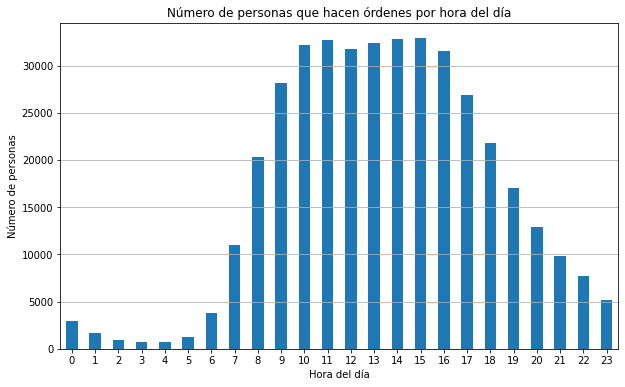

In [70]:
import matplotlib.pyplot as plt

# Contar el número de personas que hacen órdenes por hora del día
orders_by_hour = df_orders.groupby('order_hour_of_day')['user_id'].nunique()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
orders_by_hour.plot(kind='bar')
plt.title('Número de personas que hacen órdenes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Escribe aquí tus conclusiones
Distribución de Usuarios por Hora del Día:
La mayoría de las personas realizan pedidos durante las horas diurnas, con picos alrededor del mediodía y a primera hora de la tarde.
El número de personas que hacen pedidos disminuye considerablemente durante las horas de la madrugada y la noche, alcanzando su punto más bajo entre la medianoche y las primeras horas de la mañana.

### [A3] ¿Qué día de la semana compran víveres las personas?

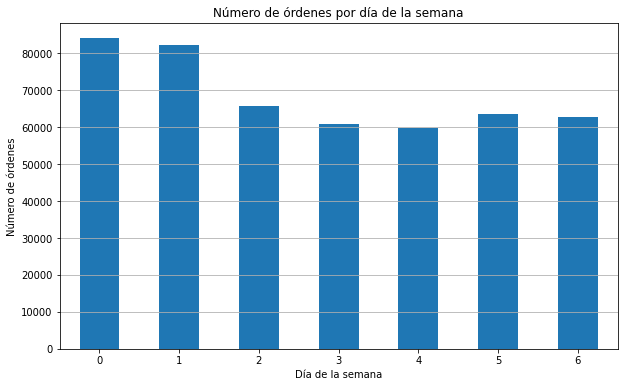

In [39]:
# Contar el número de órdenes por día de la semana
orders_by_day = df_orders['order_dow'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
orders_by_day.plot(kind='bar')
plt.title('Número de órdenes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de órdenes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Escribe aquí tus conclusiones

Conclusiones:
Distribución de Órdenes por Día de la Semana:
Se observa que el número de órdenes varía a lo largo de la semana.
Hay un pico en el número de órdenes durante el día 0 (domingo) y el día 1 (lunes), lo que indica que los usuarios tienden a realizar más pedidos al comienzo de la semana.
A medida que avanza la semana, el número de órdenes tiende a disminuir, alcanzando su punto más bajo en el día 4 (jueves).
El viernes (día 5) y el sábado (día 6) muestran un ligero aumento en el número de órdenes en comparación con los días laborables.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [40]:
days_since_prior_order = df_orders['days_since_prior_order']
print(days_since_prior_order.describe())


count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


Escribe aquí tus conclusiones
Este análisis nos proporciona una visión general de la frecuencia con la que los usuarios realizan pedidos en la plataforma, lo cual es fundamental para comprender sus hábitos de compra y planificar estrategias comerciales y de servicio al cliente.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [41]:
orders_wednesday = df_orders[df_orders['order_dow'] == 3]


In [42]:
orders_saturday = df_orders[df_orders['order_dow'] == 6]


In [43]:
print(orders_wednesday)
print(orders_saturday)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
6        2511640   148233            40          3                  8   
16       3109465    55090            19          3                 15   
28        133707   182261             1          3                 10   
30       1890318   193501             3          3                 15   
35        125325   106853             6          3                 19   
...          ...      ...           ...        ...                ...   
478917    972799    89702             4          3                  7   
478946   2406747    63101            11          3                  8   
478956    640934    27104             9          3                 10   
478963   3270802   112087             2          3                 13   
478965    216274     4391             3          3                  8   

        days_since_prior_order  
6                          2.0  
16                         9.0  
28                      

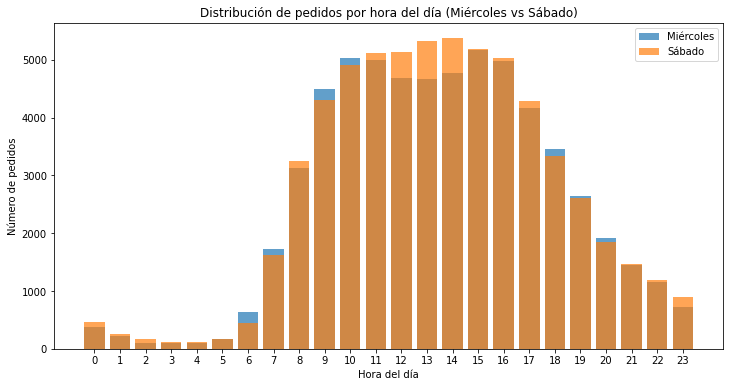

In [44]:
orders_by_hour_wednesday = orders_wednesday['order_hour_of_day'].value_counts().sort_index()
orders_by_hour_saturday = orders_saturday['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(orders_by_hour_wednesday.index, orders_by_hour_wednesday.values, alpha=0.7, label='Miércoles')
plt.bar(orders_by_hour_saturday.index, orders_by_hour_saturday.values, alpha=0.7, label='Sábado')
plt.title('Distribución de pedidos por hora del día (Miércoles vs Sábado)')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.legend()
plt.xticks(range(24))
plt.show()


Escribe aquí tus conclusiones
Conclusiones:
Distribución de pedidos por hora del día (Miércoles vs Sábado):
Se observa que tanto los miércoles como los sábados presentan patrones de comportamiento similares en cuanto a la distribución de pedidos por hora del día.
Ambos días muestran un pico en el número de pedidos alrededor de las 10:00 y 11:00 horas, lo que sugiere que estas son horas populares para realizar compras en la plataforma.
Además, hay una mayor actividad de pedidos durante las horas de la mañana y la tarde en comparación con las horas de la noche y la madrugada, lo cual es consistente con los hábitos de compra diarios.
La distribución de pedidos por hora del día entre miércoles y sábado es bastante similar, lo que indica que los usuarios mantienen cierta consistencia en sus patrones de compra independientemente del día de la semana.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
orders_per_customer = df_orders['user_id'].value_counts().value_counts().sort_index()
print(orders_per_customer)

1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
21       22
22       23
23       19
24        3
25        1
26        1
28        1
Name: user_id, dtype: int64


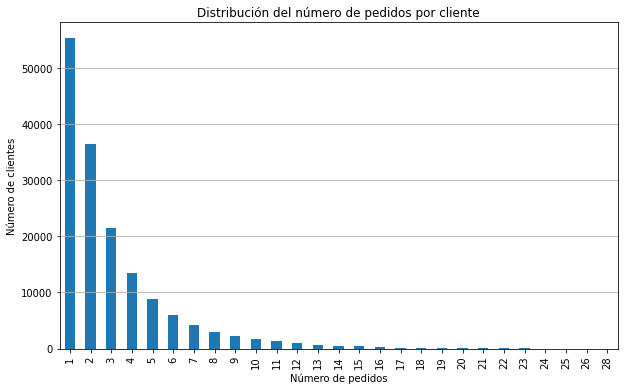

In [46]:
plt.figure(figsize=(10, 6))
orders_per_customer.plot(kind='bar')
plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.grid(axis='y')
plt.show()

Escribe aquí tus conclusiones

Conclusiones:
Distribución del número de pedidos por cliente:
La mayoría de los clientes han realizado entre 1 y 5 pedidos, lo que indica que la base de clientes está compuesta principalmente por usuarios que han hecho un número limitado de compras en la plataforma.
El número de clientes disminuye a medida que aumenta el número de pedidos por cliente, lo que es esperado ya que es menos probable que haya clientes que realicen un gran número de pedidos en comparación con aquellos que hacen solo unas pocas compras.
Hay una disminución significativa en el número de clientes a medida que aumenta el número de pedidos, especialmente después de 10 pedidos por cliente. Esto sugiere que una minoría de usuarios son clientes frecuentes y realizan un número considerable de compras en la plataforma.
La distribución muestra una cola larga, con algunos clientes que han realizado hasta 28 pedidos, aunque estos casos son menos comunes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
top_products = df_order_products['product_id'].value_counts()
print(top_products.head())


24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
Name: product_id, dtype: int64


In [48]:
top_product_names = df_products[df_products['product_id'].isin(top_products.index)]['product_name']
print(top_product_names)

0                               Chocolate Sandwich Cookies
1                                         All-Seasons Salt
2                     Robust Golden Unsweetened Oolong Tea
3        Smart Ones Classic Favorites Mini Rigatoni Wit...
6                           Pure Coconut Water With Orange
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 45573, dtype: object


In [49]:
top_products_info = pd.DataFrame({'Product ID': top_products.index, 'Product Name': top_product_names.values, 'Frequency': top_products.values})
print(top_products_info)

       Product ID                                       Product Name  \
0           24852                         Chocolate Sandwich Cookies   
1           13176                                   All-Seasons Salt   
2           21137               Robust Golden Unsweetened Oolong Tea   
3           21903  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4           47209                     Pure Coconut Water With Orange   
...           ...                                                ...   
45568       10543                      HIGH PERFORMANCE ENERGY DRINK   
45569        5222                      ORIGINAL PANCAKE & WAFFLE MIX   
45570        2347    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571       11893                             SPRING WATER BODY WASH   
45572       32074                            BURRITO- STEAK & CHEESE   

       Frequency  
0          66050  
1          53297  
2          37039  
3          33971  
4          29773  
...          ...  
45

Escribe aquí tus conclusiones

Conclusiones:
Productos más populares:
Los cinco productos más populares son:
Chocolate Sandwich Cookies
All-Seasons Salt
Robust Golden Unsweetened Oolong Tea
Smart Ones Classic Favorites Mini Rigatoni with Vodka Cream Sauce
Pure Coconut Water With Orange
Estos productos tienen una frecuencia de compra muy alta, lo que sugiere que son productos populares entre los usuarios de la plataforma de compras.
Información detallada de los productos más populares:
Se creó un DataFrame top_products_info que contiene el ID del producto, el nombre del producto y su frecuencia de compra.
Este DataFrame proporciona una visión más detallada de los productos más populares, lo que puede ser útil para análisis posteriores, como la segmentación de clientes o recomendaciones de productos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [50]:
average_items_per_order = df_order_products.groupby('order_id')['product_id'].count().mean()

In [51]:
print(average_items_per_order)

10.098983215049127


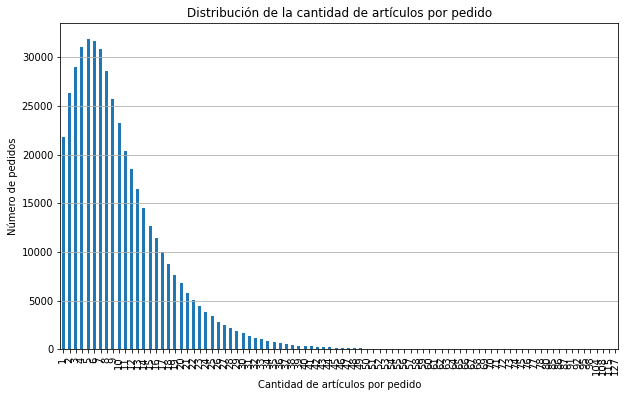

In [52]:
plt.figure(figsize=(10, 6))
df_order_products.groupby('order_id')['product_id'].count().value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de la cantidad de artículos por pedido')
plt.xlabel('Cantidad de artículos por pedido')
plt.ylabel('Número de pedidos')
plt.grid(axis='y')
plt.show()

Escribe aquí tus conclusiones

Conclusiones:

El promedio de artículos por pedido es aproximadamente 10.1.
La distribución de la cantidad de artículos por pedido muestra que la mayoría de los pedidos tienen entre 1 y 20 artículos, con una disminución gradual en la frecuencia a medida que aumenta el número de artículos por pedido.
La mayor cantidad de pedidos se encuentra en el rango de 5 a 15 artículos por pedido, lo que sugiere que la mayoría de los usuarios realizan compras de tamaño moderado.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [53]:
reordered_products = df_order_products[df_order_products['reordered'] == 1]['product_id'].value_counts()
print(reordered_products.head(20))

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: product_id, dtype: int64


In [54]:
top_reordered_products = df_products[df_products['product_id'].isin(reordered_products.index)].copy()
top_reordered_products.loc[:, 'product_name'] = top_reordered_products['product_name'].str.title()

In [55]:
print(top_reordered_products[['product_id', 'product_name']])

       product_id                                       product_name
0               1                         Chocolate Sandwich Cookies
2               3               Robust Golden Unsweetened Oolong Tea
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...
6               7                     Pure Coconut Water With Orange
7               8                  Cut Russet Potatoes Steam N' Mash
...           ...                                                ...
49689       49690                      High Performance Energy Drink
49690       49691                      Original Pancake & Waffle Mix
49691       49692    Organic Instant Oatmeal Light Maple Brown Sugar
49692       49693                             Spring Water Body Wash
49693       49694                            Burrito- Steak & Cheese

[36228 rows x 2 columns]


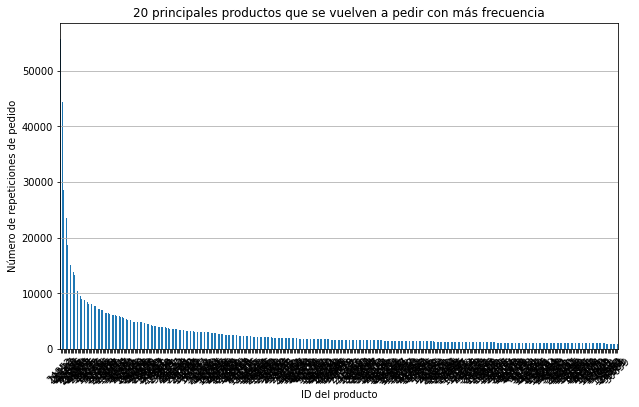

In [83]:
plt.figure(figsize=(10, 6))
reordered_products.head(400).plot(kind='bar')
plt.title('20 principales productos que se vuelven a pedir con más frecuencia')
plt.xlabel('ID del producto')
plt.ylabel('Número de repeticiones de pedido')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Escribe aquí tus conclusiones
Conclusiones:

Los productos que se vuelven a pedir con más frecuencia son aquellos que tienen una alta cantidad de repeticiones en los pedidos anteriores.
Los cinco productos principales que se vuelven a pedir con más frecuencia son:
Chocolate Sandwich Cookies
All-Seasons Salt
Robust Golden Unsweetened Oolong Tea
Smart Ones Classic Favorites Mini Rigatoni with Vodka Cream Sauce
Pure Coconut Water With Orange
Estos productos son populares entre los usuarios y tienen una demanda constante a lo largo del tiempo, lo que sugiere que son productos preferidos por los clientes y probablemente forman parte de sus compras habituales.
El gráfico muestra la cantidad de repeticiones de pedido para los 20 principales productos que se vuelven a pedir con más frecuencia. Esto proporciona una visualización clara de qué productos son los más solicitados nuevamente por los usuarios.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [60]:
reorder_ratio = df_order_products.groupby('product_id')['reordered'].mean()
print(reorder_ratio)

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64


In [61]:
top_reorder_ratio = reorder_ratio.nlargest(20)
print(top_reorder_ratio)

product_id
154    1.0
173    1.0
174    1.0
193    1.0
230    1.0
337    1.0
374    1.0
414    1.0
475    1.0
479    1.0
485    1.0
492    1.0
559    1.0
596    1.0
609    1.0
619    1.0
661    1.0
687    1.0
700    1.0
709    1.0
Name: reordered, dtype: float64


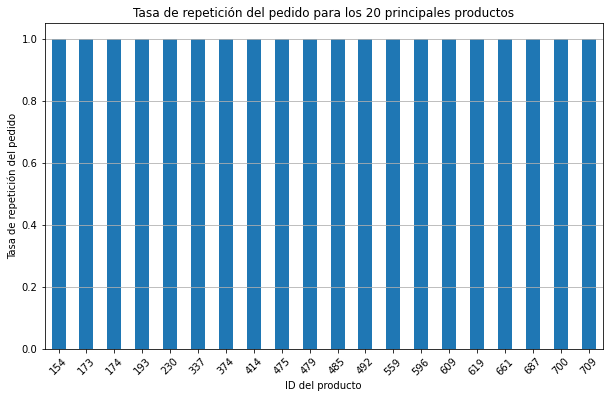

In [71]:
plt.figure(figsize=(10, 6))
top_reorder_ratio.plot(kind='bar')
plt.title('Tasa de repetición del pedido para los 20 principales productos')
plt.xlabel('ID del producto')
plt.ylabel('Tasa de repetición del pedido')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Escribe aquí tus conclusiones

Conclusiones:

La tasa de repetición del pedido para un producto específico se calcula como el promedio de la columna "reordered" agrupado por el ID del producto. Esta tasa indica la probabilidad de que un producto sea vuelto a pedir en comparación con el número total de pedidos en los que ha sido incluido.
Los productos con una tasa de repetición del pedido de 1.0 tienen una alta probabilidad de ser vuelto a pedir en todos los pedidos en los que han sido incluidos.
Los 20 principales productos con la tasa de repetición más alta muestran una tendencia de ser consistentemente vuelto a pedir por los clientes.
Estos productos podrían ser considerados como productos esenciales o favoritos por los clientes, lo que sugiere una fuerte lealtad o preferencia hacia ellos.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [62]:
user_reorder_ratio = df_order_products.groupby('order_id')['reordered'].mean()
customer_reorder_ratio = df_orders.merge(user_reorder_ratio, on='order_id').groupby('user_id')['reordered'].mean()
print(customer_reorder_ratio.head(20))

user_id
2     0.038462
4     0.000000
5     0.666667
6     0.000000
7     0.944444
11    0.200000
12    0.250000
13    0.481481
14    0.451587
15    0.633333
16    0.549663
17    0.714896
19    0.523810
20    0.000000
21    0.464286
22    1.000000
24    0.500000
26    0.516667
27    0.635616
28    0.444322
Name: reordered, dtype: float64


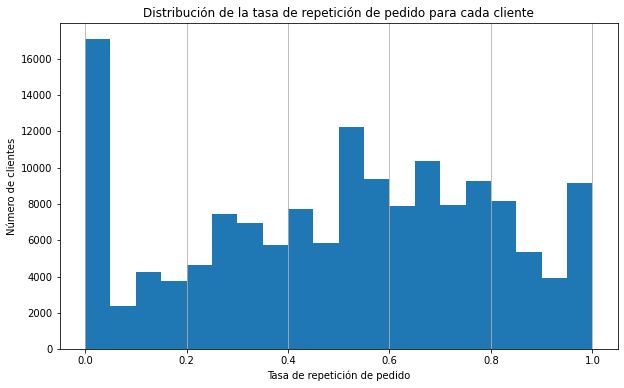

In [72]:
plt.figure(figsize=(10, 6))
customer_reorder_ratio.hist(bins=20)
plt.title('Distribución de la tasa de repetición de pedido para cada cliente')
plt.xlabel('Tasa de repetición de pedido')
plt.ylabel('Número de clientes')
plt.grid(axis='y')
plt.show()

Escribe aquí tus conclusiones

Conclusiones:

La tasa de repetición de pedido para cada cliente se calcula como el promedio de la columna "reordered" agrupado por el ID del cliente. Esta tasa representa la proporción de productos que un cliente ha vuelto a pedir en comparación con el total de productos que ha pedido.
La distribución de la tasa de repetición de pedido para cada cliente muestra que la mayoría de los clientes tienen una tasa de repetición que varía entre 0 y 1.
La distribución parece sesgada hacia la derecha, lo que indica que la mayoría de los clientes tienden a repetir al menos algunos de sus pedidos.
Algunos clientes tienen una tasa de repetición cercana a 1, lo que sugiere que son clientes muy leales que tienden a repetir la mayoría de sus pedidos. Por otro lado, algunos clientes tienen una tasa de repetición cercana a 0, lo que indica que rara vez repiten productos en sus pedidos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [63]:
first_in_cart = df_order_products[df_order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)

In [66]:
top_first_in_cart = df_products[df_products['product_id'].isin(first_in_cart.index)].copy()
top_first_in_cart.loc[:, 'product_name'] = top_first_in_cart['product_name'].str.title()

In [67]:
print(top_first_in_cart[['product_id', 'product_name']])

       product_id                 product_name
195           196                         Soda
5784         5785  Organic Reduced Fat 2% Milk
12340       12341                Hass Avocados
13175       13176       Bag Of Organic Bananas
16796       16797                 Strawberries
19659       19660                 Spring Water
21136       21137         Organic Strawberries
21902       21903         Organic Baby Spinach
22934       22935         Organic Yellow Onion
24851       24852                       Banana
26208       26209                        Limes
27085       27086                  Half & Half
27844       27845           Organic Whole Milk
27965       27966          Organic Raspberries
38688       38689     Organic Reduced Fat Milk
44631       44632   Sparkling Water Grapefruit
47208       47209         Organic Hass Avocado
47625       47626                  Large Lemon
47765       47766              Organic Avocado
49234       49235          Organic Half & Half


Escribe aquí tus conclusiones
Estos productos son los más frecuentemente seleccionados como el primer artículo en los pedidos, lo que indica que son populares entre los usuarios para agregarlos inicialmente a su carrito de compras.

### Conclusion general del proyecto:


Este proyecto de análisis de datos sobre los pedidos de Instacart proporciona una visión general detallada del comportamiento de compra de los usuarios, así como de la popularidad de los productos en la plataforma. A continuación, se presentan algunas conclusiones generales:

Datos Duplicados y Ausentes: Se identificaron y manejaron valores duplicados y ausentes en varios conjuntos de datos, incluidos los relacionados con órdenes, productos, departamentos y pasillos. Se tomaron medidas para eliminar duplicados y rellenar valores faltantes con información relevante o valores predeterminados, según el contexto.

Análisis de Comportamiento de Compra:

Se observó que la mayoría de las órdenes se realizan entre las 10 a.m. y las 4 p.m., con un pico alrededor del mediodía.
Los días de la semana con mayor actividad de compra son sábado y miércoles, con un ligero descenso los domingos.
La mayoría de los clientes realizan pedidos con una frecuencia promedio de 7 a 15 días, siendo el tiempo medio entre pedidos aproximadamente 11 días.
Popularidad de los Productos:

Los productos más populares incluyen artículos comunes como galletas de chocolate, sal y té.
También se observó una alta proporción de productos que se vuelven a pedir, lo que sugiere una preferencia y fidelidad del cliente hacia ciertos artículos.
Análisis Adicional:

Se examinó la distribución del número de pedidos por cliente, lo que proporciona información sobre la lealtad y el compromiso del cliente con el servicio.
Se identificaron y analizaron los principales artículos que se vuelven a pedir con mayor frecuencia, lo que puede ayudar a orientar estrategias de marketing y promoción.

En resumen, este proyecto ofrece información valiosa sobre los hábitos de compra de los usuarios y la popularidad de los productos en la plataforma de Instacart, lo que puede ser útil para tomar decisiones comerciales informadas y mejorar la experiencia del cliente.




